In [87]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import os
from numpy import *

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [88]:
from sklearn.svm import SVC
from sklearn import datasets

dateAndTime = "2018-11-14-10-08-37/";
filename = '/Users/roberto/data/RO-logging/'+dateAndTime+'MaxEVec.csv';
print('Reading from: ' + filename)
df1 = pd.read_csv(filename, names=range(1800))
df1

Reading from: /Users/roberto/data/RO-logging/2018-11-14-10-08-37/MaxEVec.csv


,0,1,2,3,4,5,6,7,8,9,...,1790,1791,1792,1793,1794,1795,1796,1797,1798,1799
0,0.029035,0.027224,0.026921,0.026812,0.022956,0.024624,0.028507,0.027556,0.026689,0.022917,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.029193,0.027950,0.021924,0.024238,0.022618,0.029673,0.026126,0.027587,0.026544,0.026284,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.027923,0.027767,0.021120,0.024785,0.026510,0.021432,0.027942,0.028055,0.026228,0.025927,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.027828,0.022329,0.026597,0.025500,0.026868,0.023346,0.027827,0.020408,0.025424,0.026183,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.027507,0.022679,0.017050,0.019717,0.020500,0.027986,0.022798,0.021531,0.027370,0.024165,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.032448,0.030447,0.021825,0.025065,0.028454,0.023498,0.030018,0.025233,0.032115,0.024841,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.025084,0.008891,0.036768,0.043141,0.045162,0.012826,0.028431,0.033841,0.024990,0.013403,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


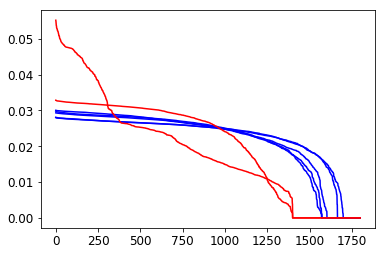

In [115]:
#convert dataframe to matrix
eigenvecs = np.copy(df1.values)
where_are_NaNs = isnan(eigenvecs)
eigenvecs[where_are_NaNs] = 0
[m,n] = shape(eigenvecs)
eigenvecs.sort()
eigenvecs = np.fliplr(eigenvecs)
import itertools

label_colours = ['blue','blue','blue','blue','blue','red','red']

# plt.figure();
for i in range(m):
    plt.plot(eigenvecs[i,:].T, color=label_colours[i]);